In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# LOG

In [2]:
#file_path = "C:\\Users\\jjunior\\Documents\\GitHub\\GECCO19\\results"+"\\190314_01n"+"\\190314_01n_log.csv"
file_path = "C:\\Users\\jjunior\\Documents\\Junior\\ON\\2019\\GECCO'19\\from_biman\\190314\\results_190313\\190313_06"+"\\190313_06_log.csv"

#load data
data_log = pd.read_csv(file_path, header=None)

#header
header = ["GENERATIONS", "MULTIPLIER", "FIT_MEDIAN"]
for i in range(1, data_log.shape[1] - 2):
    header.append("FIT_INDV_"+str(i))
data_log.columns = header

#converting M to log M
data_log["MULTIPLIER"] = np.log10(data_log["MULTIPLIER"])

## Evolution of Fit_Median and Multiplier

Text(0,0.5,"['MULTIPLIER', 'FIT_MEDIAN']")

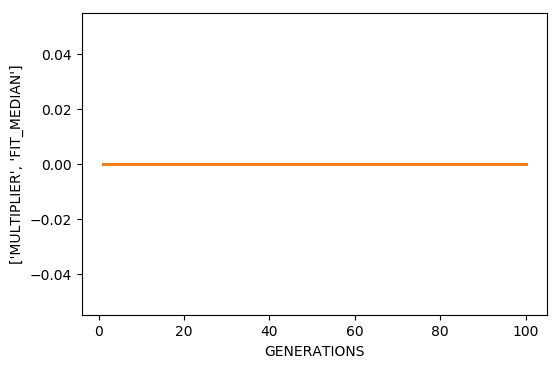

In [10]:
rcParams['figure.dpi'] = 100

x = "GENERATIONS"
y = ["MULTIPLIER", "FIT_MEDIAN"]

_, ax = plt.subplots()
ax.plot(data_log[x], data_log[y], lw = 2)
ax.set_title("")
ax.set_xlabel(x)
ax.set_ylabel(y)

## Evolution of Individuals

MAX MIN
0.4 0.25


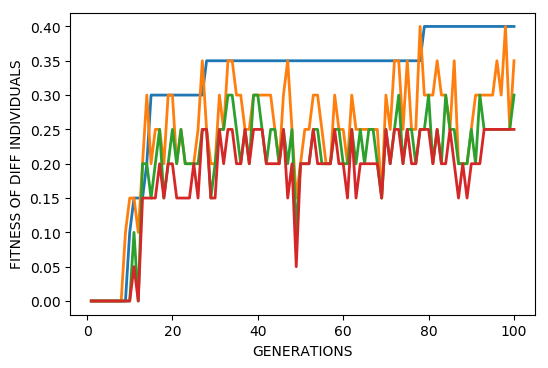

In [4]:
rcParams['figure.dpi'] = 100

x = "GENERATIONS"
y = data_log.columns[3:7]

_, ax = plt.subplots()
ax.plot(data_log[x], data_log[y], lw = 2)
ax.set_title("")
ax.set_xlabel(x)
ax.set_ylabel("FITNESS OF DIFF INDIVIDUALS")

print("MAX MIN")
print(data_log[y].max().max(), data_log[y].max().min())

# HISTORY

In [5]:
#file_path = "C:\\Users\\jjunior\\Documents\\GitHub\\GECCO19\\results"+"\\190314_01n"+"\\190314_01n_history.csv"
file_path = "C:\\Users\\jjunior\\Documents\\Junior\\ON\\2019\\GECCO'19\\from_biman\\190314\\results_190313\\190313_06"+"\\190313_06_history.csv"

#load data
data_his_raw = pd.read_csv(file_path)

In [6]:
data_hist = pd.DataFrame(columns=["PROBLEM", "GENERATION", "MIN"])
problems = data_his_raw.columns[3:]

for i in range(data_his_raw["gen"].max()):
    tmp = data_his_raw[data_his_raw["gen"]==i]
    
    for p in problems:
        g = i
        m = tmp[p].min()
        
        data_hist.loc[len(data_hist)] = [p,g,m]
        
data_hist = data_hist.sort_values(by=["PROBLEM", "GENERATION"])

In [7]:
import pickle
file = open("bbob_final_target_fvalue1.pkl",'rb')
d = pickle.load(file)
file.close()

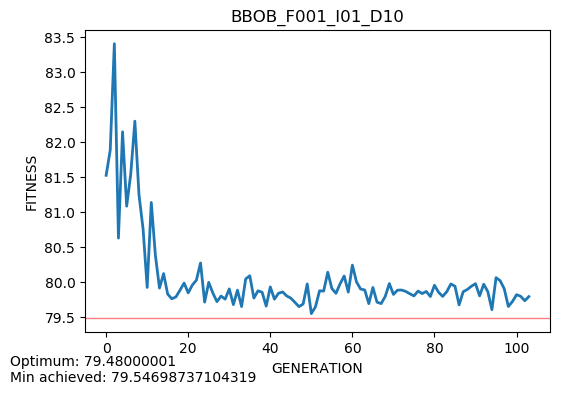

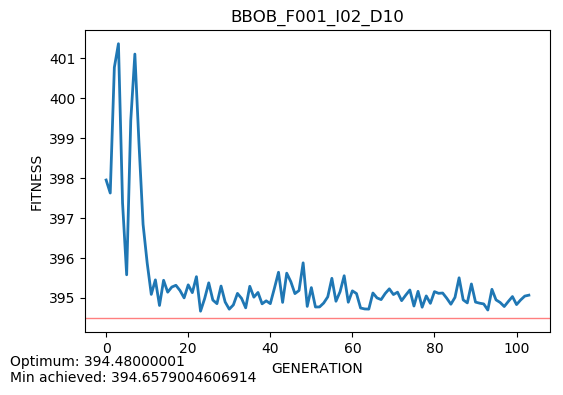

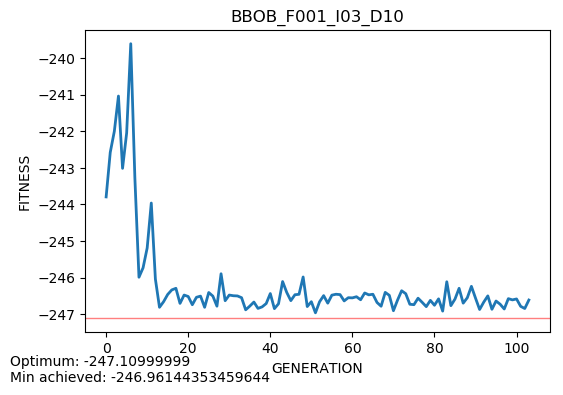

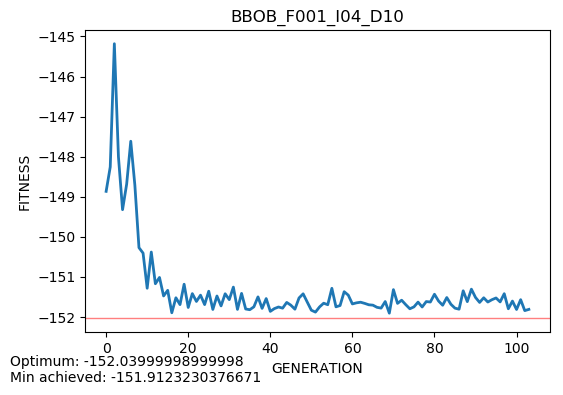

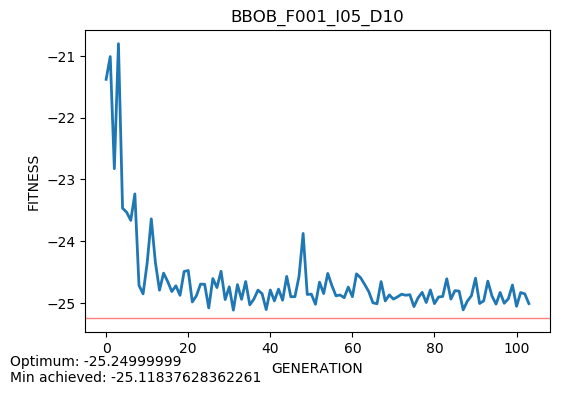

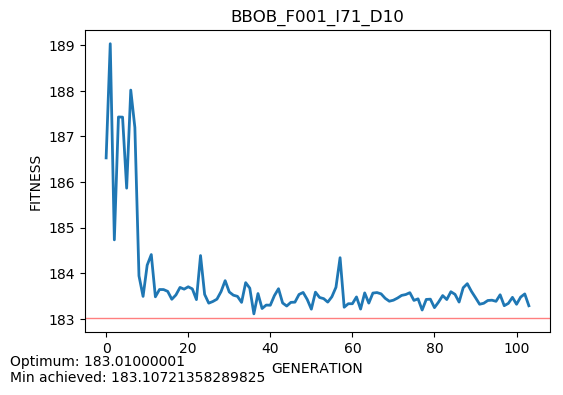

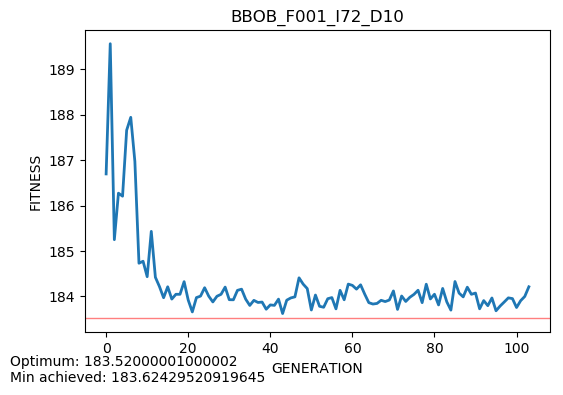

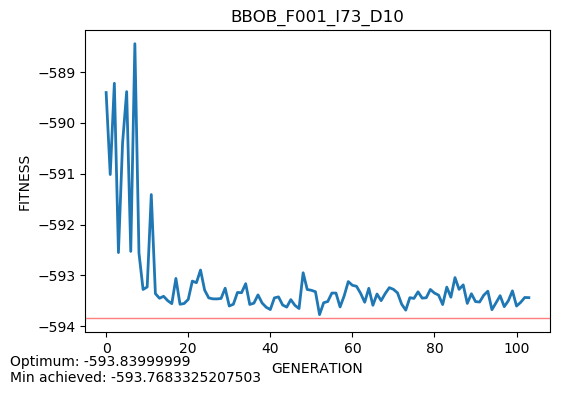

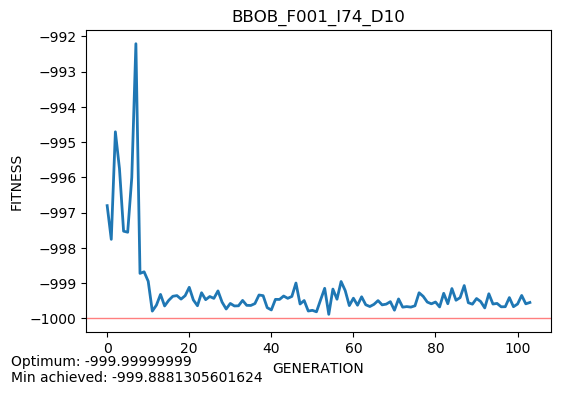

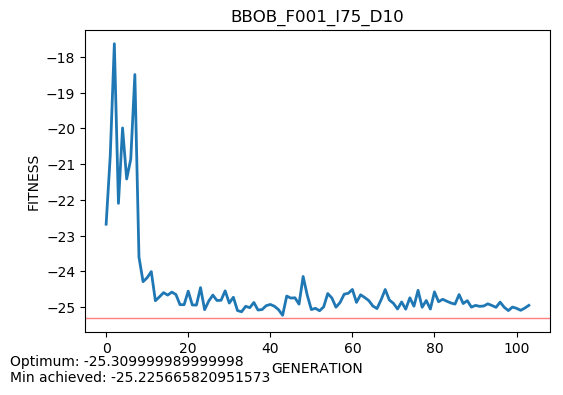

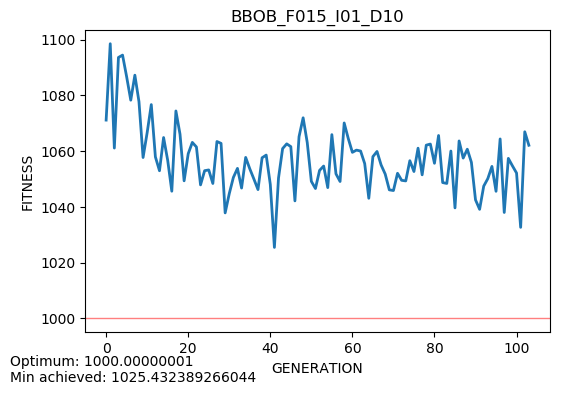

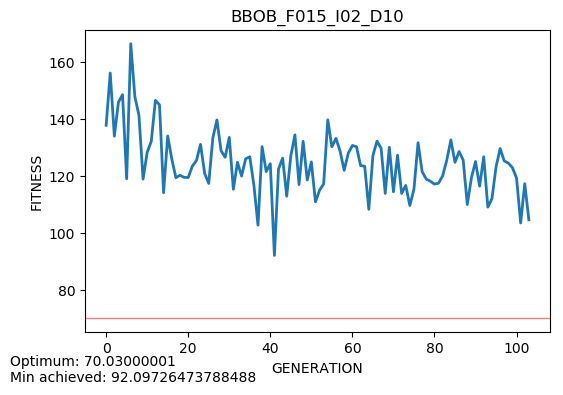

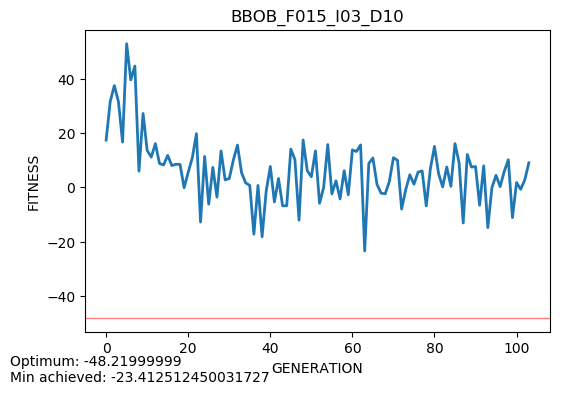

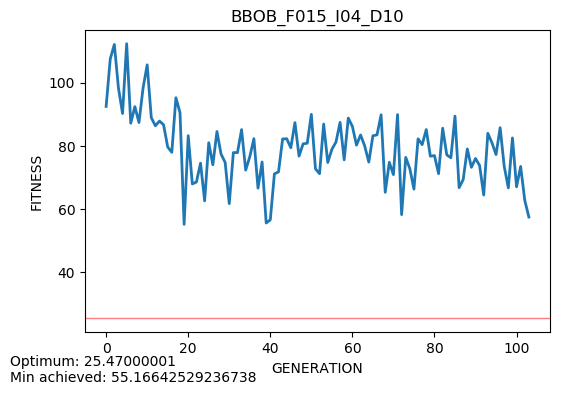

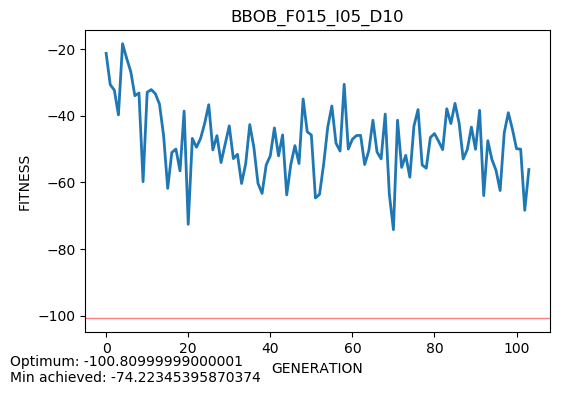

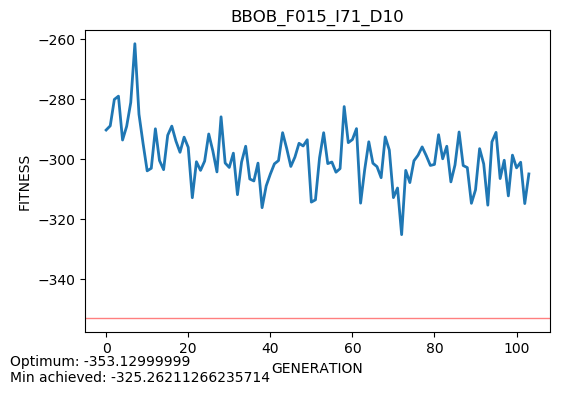

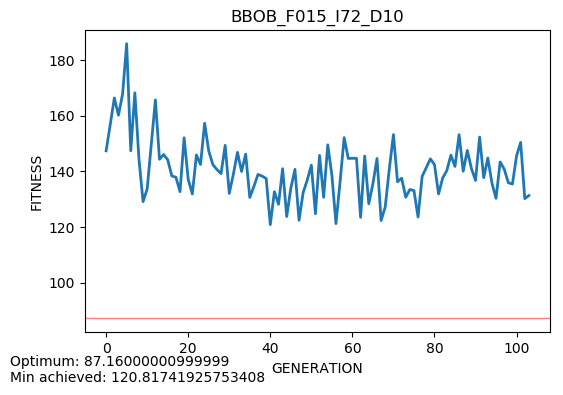

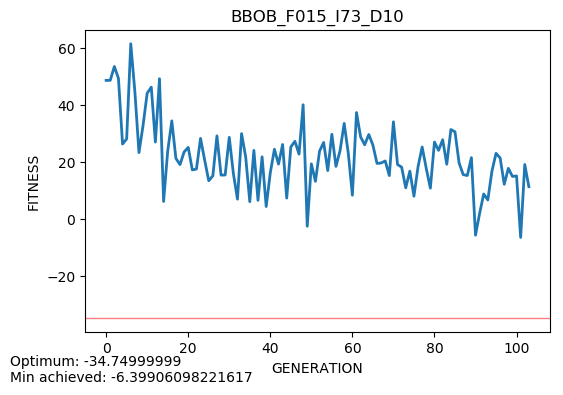

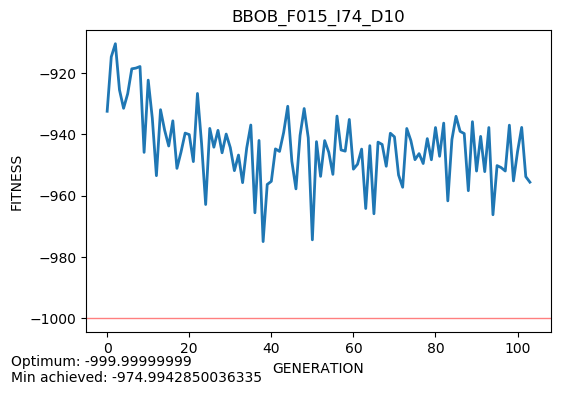

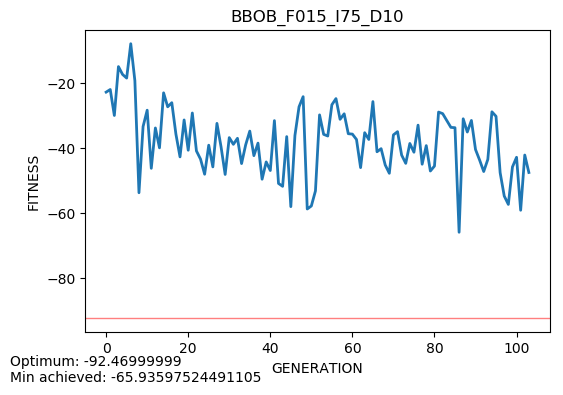

In [8]:
rcParams['figure.dpi'] = 100

problem = "bbob_f001_i01_d10"

for problem in problems:
    x = "GENERATION"
    y = "MIN"

    tmp = data_hist[data_hist["PROBLEM"]==problem]

    _, ax = plt.subplots()
    ax.plot(tmp[x], tmp[y], lw = 2)
    ax.axhspan(d[problem], d[problem], color='red', alpha=0.5)
    #ax.set_title(problem.upper()+"\n"+"Opt: "+str(d[problem])+"\n"+"Min: "+str(tmp[y].min()), loc="left")
    
    ax.set_title(problem.upper())
    plt.figtext(0, 0, "Optimum: "+str(d[problem])+"\n"+"Min achieved: "+str(tmp[y].min()))
    ax.set_xlabel("GENERATION")
    ax.set_ylabel("FITNESS")